In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [16]:
def sigmoid(x):
    return 1.0/(1+np.exp(-1.0 * x))

def eta_s(s):
    return (-1) ** s

def eta_s_t(s,t):
    return 0.5

def mu_s(s, X):
    neigh_list = get_neighbour_nodes(s)
    arg = eta_s(s) + sum([(eta_s_t(s,k) * X[k,0]) for k in neigh_list])
#    print(arg)
    return sigmoid(arg)
    
def tau_s(s, tau):
    neigh_list = get_neighbour_nodes(s)
    arg = eta_s(s) + sum([(eta_s_t(s,k) * tau[k,0]) for k in neigh_list])
#    print(arg)
    return sigmoid(arg)

def get_node_id(row_id, col_id, grid_dim):
    if row_id > 0:
        return (row_id-1)*grid_dim + col_id + 1
    else:
        return col_id + 1

In [17]:
def get_neighbour_nodes(node_id, grid_dim=7):
    row_id = math.floor((node_id-1)/grid_dim)
    col_id = node_id -1 - grid_dim * row_id
    
    neigh_list = []
    
    if col_id != 0:
        neigh_list.append(get_node_id(row_id, col_id-1, grid_dim))
        
    if col_id != (grid_dim-1):
        neigh_list.append(get_node_id(row_id, col_id+1, grid_dim))
        
    if row_id != 0:
        neigh_list.append(get_node_id(row_id-1, col_id, grid_dim))
        
    if col_id != (grid_dim-1):
        neigh_list.append(get_node_id(row_id+1, col_id, grid_dim))
        
    if row_id == 0:
        neigh_list.append(get_node_id(grid_dim-1,col_id, grid_dim))
    
    if row_id == (grid_dim-1):
        neigh_list.append(get_node_id(0,col_id, grid_dim))
        
    if col_id == 0:
        neigh_list.append(get_node_id(row_id, grid_dim-1, grid_dim))
    
    if col_id == (grid_dim-1):
        neigh_list.append(get_node_id(row_id, 0, grid_dim))
        
    return neigh_list

In [18]:
def run_expt():
    
    X = np.random.rand(n_nodes+1,1)
    y = (X > 0.5)
    X = np.ones_like(X)
    X[y] = 0

    for iter in range(1000):
        for i in range(1,len(X)):
            mu_i = mu_s(i, X)
            X[i] = np.random.choice(np.array([0,1]),p=[(1-mu_i), mu_i])
    
    samples = np.zeros((5000,n_nodes+1))
    
    for iter in range(5000):
        for i in range(1,len(X)):
            mu_i = mu_s(i, X)
            X[i] = np.random.choice(np.array([0,1]),p=[(1-mu_i), mu_i])
        samples[iter,:] = X.flatten()
        
    moment_matrix = np.zeros((grid_dim,grid_dim))
    
    for node_id in range(1,n_nodes+1):
        row_id = math.floor((node_id-1)/grid_dim)
        col_id = node_id -1 - grid_dim * row_id
        moment_matrix[row_id][col_id] = np.mean(samples[:,node_id])
        
    return moment_matrix

In [19]:
def dist(tau_1, tau_2):
    abs_diff = np.absolute(tau_1[1:] - tau_2[1:])
    return np.mean(abs_diff)

def compute_KL_exp(tau, grid_dim=7):
        
    n_nodes = grid_dim ** 2
    
    term_1 = 0
    term_2 = 0
    
    for i in range(1,n_nodes+1):
        term_1 += eta_s(i)*tau[i]
        term_2 += tau[i]*np.log(tau[i]) + (1-tau[i])*np.log(1-tau[i])
    
    for i in range(1,n_nodes+1):
        neigh_list = get_neighbour_nodes(i)
        for j in neigh_list:
            term_1 += eta_s_t(i,j)*tau[i]*tau[j]/2.0
            
    result = -1*term_1 + term_2
    return result

In [23]:
grid_dim = 7
n_nodes = grid_dim**2

moment_matrix_repeat = np.zeros((10, grid_dim, grid_dim))

for expt_id in range(10):
    print('Gibbs sampling Expt ID:{}'.format(expt_id))
    moment_matrix_repeat[expt_id,:,:] = run_expt()
    
moment_std_matrix = np.std(moment_matrix_repeat, axis=0)
print('Estimated moments (mu_s) for first run')
print(moment_matrix_repeat[0,:,:])
print('Emphirical Standard Deviation Matrix')
print(moment_std_matrix)

Gibbs sampling Expt ID:0
Gibbs sampling Expt ID:1
Gibbs sampling Expt ID:2
Gibbs sampling Expt ID:3
Gibbs sampling Expt ID:4
Gibbs sampling Expt ID:5
Gibbs sampling Expt ID:6
Gibbs sampling Expt ID:7
Gibbs sampling Expt ID:8
Gibbs sampling Expt ID:9
Estimated moments (mu_s) for first run
[[ 0.6236  0.9082  0.6858  0.9078  0.6596  0.8954  0.556 ]
 [ 0.9196  0.604   0.9434  0.594   0.9396  0.5846  0.8776]
 [ 0.5714  0.9416  0.5498  0.9402  0.546   0.9376  0.4994]
 [ 0.9316  0.5182  0.9496  0.517   0.9446  0.5122  0.8894]
 [ 0.5726  0.9466  0.5086  0.9458  0.5114  0.939   0.4886]
 [ 0.9318  0.511   0.9452  0.5004  0.9436  0.493   0.8902]
 [ 0.6348  0.9666  0.5932  0.9594  0.5778  0.964   0.5564]]
Emphirical Standard Deviation Matrix
[[ 0.00509729  0.00433848  0.0075506   0.00303058  0.00650489  0.00470829
   0.00654168]
 [ 0.00164694  0.01153196  0.00329363  0.00369519  0.00428411  0.00922841
   0.00349377]
 [ 0.01019066  0.0030492   0.00613827  0.00419719  0.00586177  0.00455737
   0.006

In [24]:
########################### PART- B ####################################
def run_mean_field_expt():
    tau = np.random.rand(n_nodes+1,1)
    tau_prev = np.random.rand(n_nodes+1,1)
    
    KL_exp_list = []
    
    iter = 0
    while dist(tau, tau_prev) > 0.001:
#        print("Iter:{}".format(iter))
        tau_prev = tau.copy()
        for i in range(1,len(tau)):
            tau_i = tau_s(i, tau)
            tau[i] = tau_i
        KL_exp_list.append(compute_KL_exp(tau,grid_dim))
        iter += 1
        
    plt.figure()
    plt.plot([i for i in range(iter)], KL_exp_list,marker='*')
    plt.xlabel('Epochs')
    plt.ylabel('KL(q||p) - ln(Z)')
    plt.xticks([i for i in range(iter)])
    plt.title('Plot of variation of KL(q||p) - ln(Z) with no. of epochs')
    plt.show()
    
    return tau

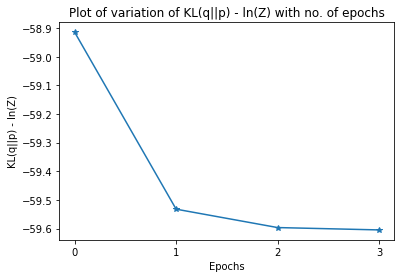

Mean Field Initialization ID: 0, Distance between mu_s and tau_s = 0.005520849247526841


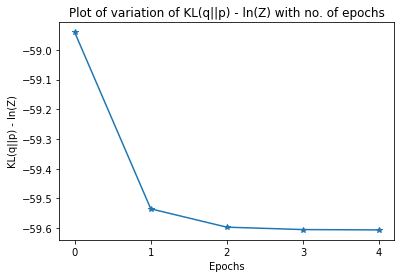

Mean Field Initialization ID: 1, Distance between mu_s and tau_s = 0.0056105430107516


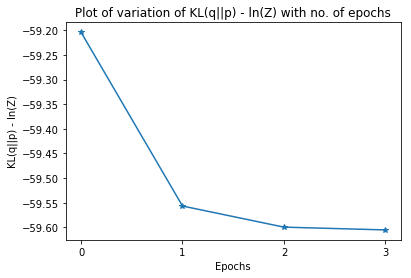

Mean Field Initialization ID: 2, Distance between mu_s and tau_s = 0.005550176125760206


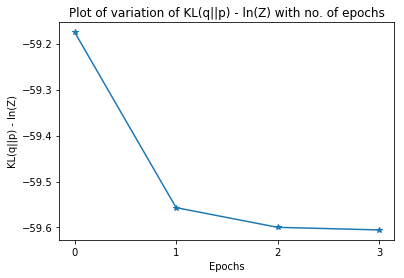

Mean Field Initialization ID: 3, Distance between mu_s and tau_s = 0.005546198879238533


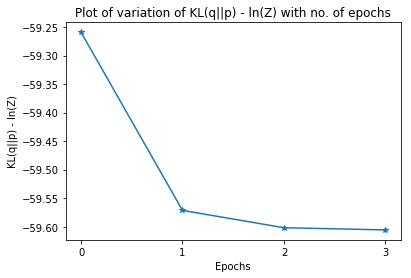

Mean Field Initialization ID: 4, Distance between mu_s and tau_s = 0.005583428518697843


In [25]:
n_init = 5

for iter in range(n_init):
    tau = run_mean_field_expt() # 50 x 1 (first index not used)
    mu = np.zeros_like(tau)
    mu[1:] = moment_matrix_repeat[-1,:,:].flatten().reshape(-1,1) # 50 x 1 (first index not used)
    
    
    d = dist(mu, tau)
    
    print("Mean Field Initialization ID: {}, Distance between mu_s and tau_s = {}".format(iter,d))